<a href="https://colab.research.google.com/github/BriDeWalt/HeadphoneData/blob/main/ShureHeadphonePlotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

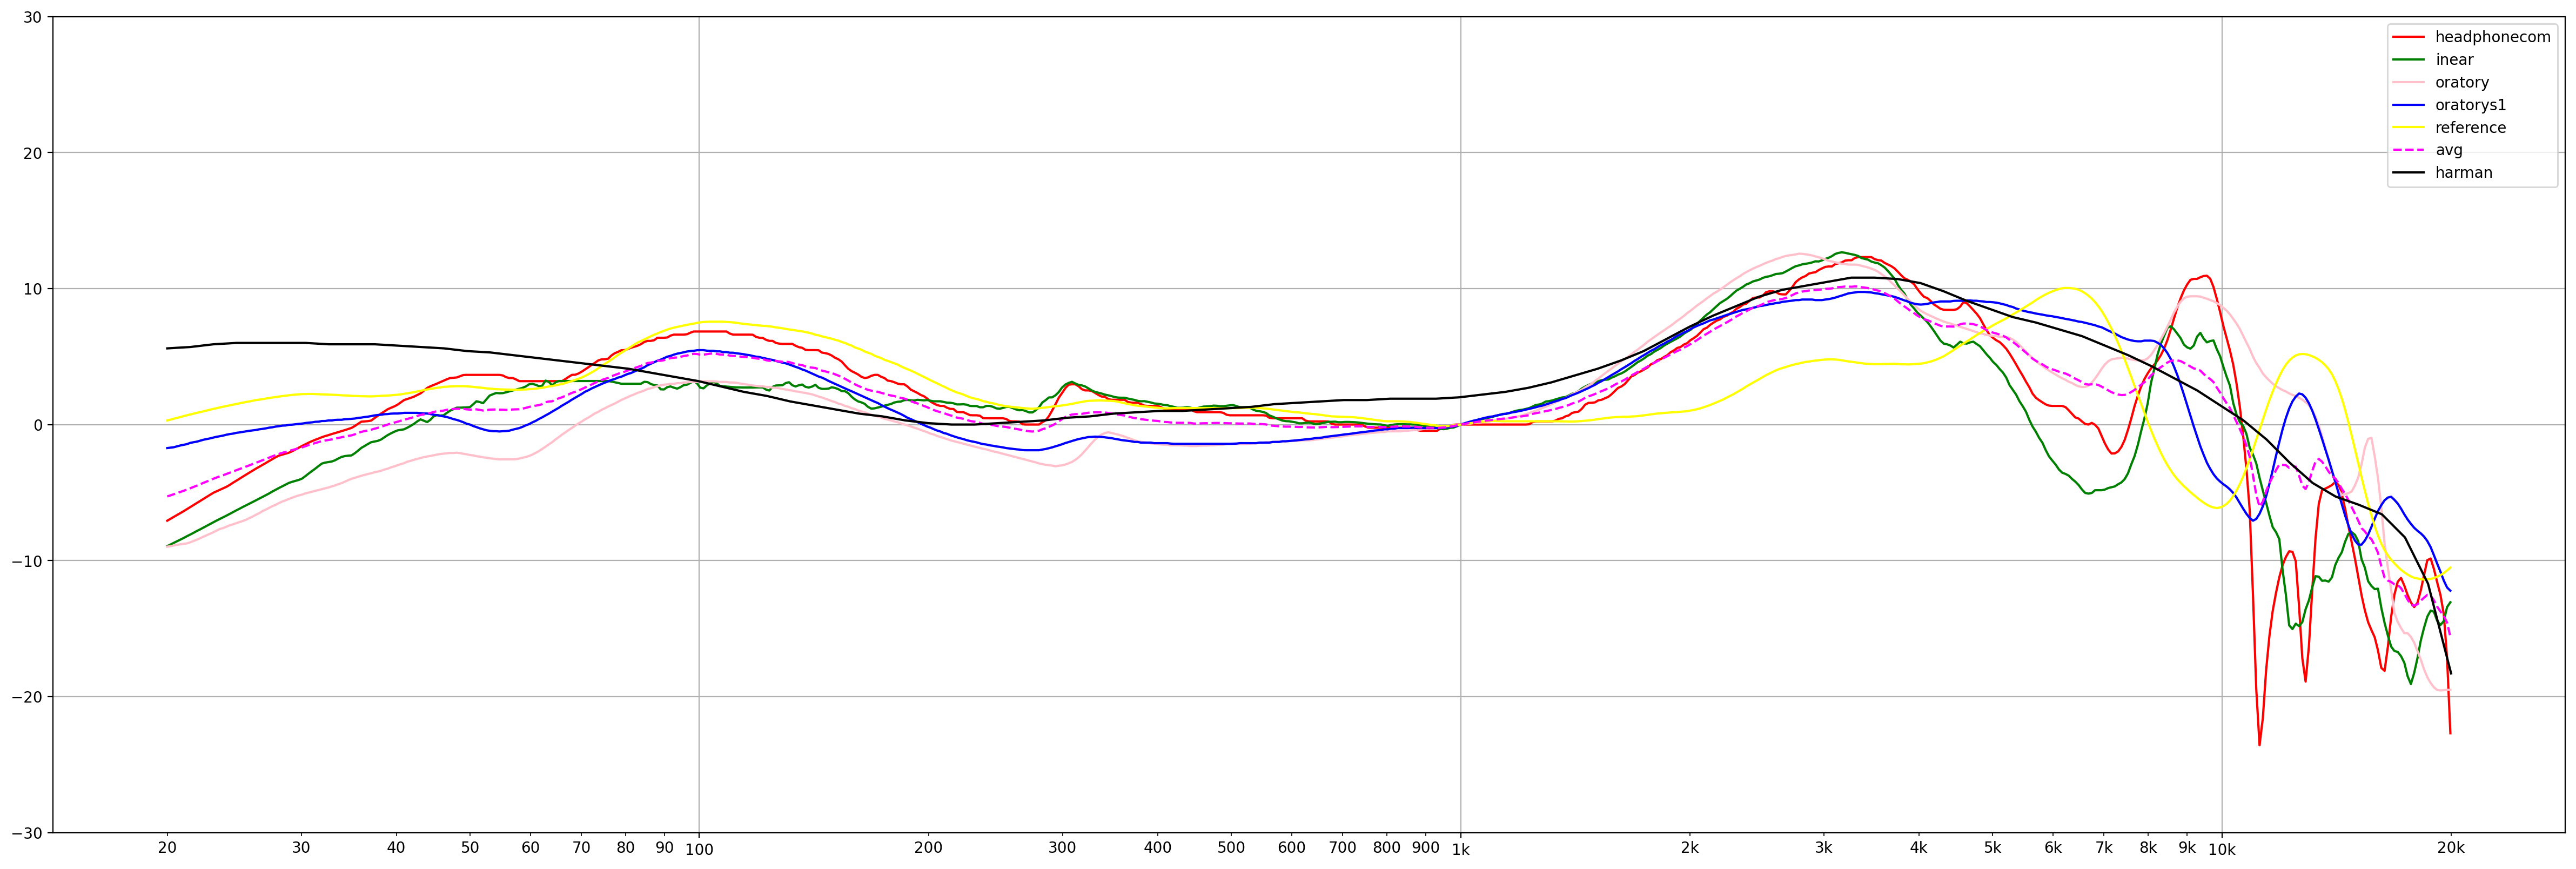

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


headphonecom = pd.read_csv('https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/headphonecom/data/onear/Shure%20SRH840/Shure%20SRH840.csv')
inear = pd.read_csv('https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/innerfidelity/data/onear/Shure%20SRH840/Shure%20SRH840.csv')
oratory = pd.read_csv('https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Shure%20SRH840/Shure%20SRH840.csv')
oratorys1 = pd.read_csv('https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Shure%20SRH840%20(sample%201)/Shure%20SRH840%20(sample%201).csv')
reference = pd.read_csv('https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/referenceaudioanalyzer/data/onear/HDM-X/Shure%20SRH840/Shure%20SRH840.csv')
harman = pd.read_csv('https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/compensation/harman.csv')


def formatter(x, pos):
  if x < 1000:
    return str(int(x))
  else:
    return str(int(x))[:-3] + 'k'
avg = (headphonecom['raw']+inear['raw']+oratory['raw']+oratorys1['raw']+reference['raw'])/5

avgdf = pd.concat([reference['frequency'], avg], axis=1)

avgdf.to_csv('/content/drive/MyDrive/measurements/avgdf.csv', index=False)
inear.to_csv('/content/drive/MyDrive/measurements/inear.csv', index=False)
oratory.to_csv('/content/drive/MyDrive/measurements/oratory.csv', index=False)
oratorys1.to_csv('/content/drive/MyDrive/measurements/oratorys1.csv', index=False)
reference.to_csv('/content/drive/MyDrive/measurements/reference.csv', index=False)
headphonecom.to_csv('/content/drive/MyDrive/measurements/headphonecom.csv', index=False)


# print(avgdf)
fig, ax = plt.subplots(dpi = 200, figsize = (30, 10))
ax.plot(headphonecom['frequency'], headphonecom['raw'], label = 'headphonecom', color = 'r')
ax.plot(inear['frequency'], inear['raw'], label = 'inear', color = 'g')
ax.plot(oratory['frequency'], oratory['raw'], label = 'oratory', color = 'pink')
ax.plot(oratorys1['frequency'], oratorys1['raw'], label = 'oratorys1', color = 'blue')
ax.plot(reference['frequency'], reference['raw'], label = 'reference', color = 'yellow')
ax.plot(reference['frequency'], avg, label = 'avg', color = 'magenta', linestyle='--')
ax.plot(harman['Frequency'], harman['Over-Ear (2018)'], label = 'harman', color = 'black')
ax.set_ybound(-30, 30)
ax.set_xscale('log')
ax.legend()
ax.xaxis.set_minor_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
ax.grid()
plt.show()

In [ ]:
!pip install autoeq

In [1]:
from autoeq.batch_processing import batch_processing

batch_processing(
  input_dir='/content/drive/MyDrive/measurements', output_dir='/content/drive/MyDrive/results', new_only=False, standardize_input=False,
  compensation='/content/drive/MyDrive/target/harman_over-ear_2018.csv', parametric_eq=True, fixed_band_eq=False, rockbox=False,
  ten_band_eq=True, parametric_eq_config='8_PEAKING_WITH_SHELVES', fixed_band_eq_config='10_BAND_GRAPHIC_EQ',
  convolution_eq=True, fs=44100, bit_depth=16, phase='minimum', f_res=10, bass_boost_gain=0,
  bass_boost_fc=105, bass_boost_q=0.7, treble_boost_gain=0, treble_boost_fc=10000, treble_boost_q=0.7, tilt=None,
  sound_signature=None, max_gain=6, thread_count=0)

100%|██████████| 6/6 [00:12<00:00,  2.10s/it]
